# Evaluation of the system with the top ids already generated

- Lyrics Features used
    - tfidf
    - word2vec
    - *bert*

- Audio Features used
    - mfcc bow
    - *mfcc stats*
    - essentia
    - blf delta spectral
    - *blf correlation*
    - *blf logfluc*
    - *blf spectral*
    - *blf spectral contrast*
    - *blf var delta spectral*
    
-  Video Features used
    - incp
    - vgg19
    - *resnet*

- Combinations of [Lyrics][Audio][Video]

    - tfidf-mfccbow-incp
    - bert-mfccbow-incp

    - tfidf_essentia_incp
    - bert-essentia-incp

    - tfidf-blfdeltaspectral-incp
    - bert-blfdeltaspectral-incp

    - tfidf-mfccbow-vgg19
    - bert-mfccbow-vgg19

    - tfidf_essentia_vgg19
    - bert-essentia-vgg19

    - tfidf-blfdeltaspectral-vgg19
    - bert-blfdeltaspectral-vgg19

In [1]:
import pandas as pd
import numpy as np
from os.path import exists
from tqdm import tqdm
import re
import datatable as dt
from matplotlib import pyplot as plt

In [2]:
# DATA FILES PROVIDED Task 2
file_genres_2   = "./../task2/id_genres_mmsr.tsv"
file_info_2     = "./../task2/id_information_mmsr.tsv"

In [5]:
# Individual Features with jaccard and cosine
f_top_cosine_tfidf      = './TopIdsTask2/top_ids_cosine_tfidf_complete_.csv'
f_top_cosine_word2vec   = './TopIdsTask2/top_ids_cosine_word2vec_complete_.csv'
f_top_cosine_bert       = './TopIdsTask2/top_ids_cosine_bert_complete_.csv'
f_top_cosine_mfcc_bow   = './TopIdsTask2/top_ids_cosine_mfcc_bow_complete_.csv'
f_top_cosine_mfcc_stats = './TopIdsTask2/top_ids_cosine_mfcc_stats_complete_.csv'
f_top_cosine_essentia   = './TopIdsTask2/top_ids_cosine_essentia_complete_.csv'
f_top_cosine_incp       = './TopIdsTask2/top_ids_cosine_incp_complete_.csv'
f_top_cosine_resnet     = './TopIdsTask2/top_ids_cosine_resnet_complete_.csv'
f_top_cosine_vgg19      = './TopIdsTask2/top_ids_cosine_vgg19_complete_.csv'
f_top_cosine_blf_delta_spectral = './TopIdsTask2/top_ids_cosine_blf_deltaspectral_complete_.csv'
f_top_cosine_blf_correlation    = './TopIdsTask2/top_ids_cosine_blf_correlation_complete_.csv'
f_top_cosine_blf_logfluc        = './TopIdsTask2/top_ids_cosine_blf_logfluc_complete_.csv'
f_top_cosine_blf_spectral           = './TopIdsTask2/top_ids_cosine_blf_spectral_complete_.csv'
f_top_cosine_blf_spectral_contrast  = './TopIdsTask2/top_ids_cosine_blf_spectralcontrast_complete_.csv'
f_top_cosine_blf_vardelta_spectral  = './TopIdsTask2/top_ids_cosine_blf_vardeltaspectral_complete_.csv'

f_top_jaccard_tfidf      = './TopIdsTask2/top_ids_jaccard_tfidf_complete.csv'
f_top_jaccard_word2vec   = './TopIdsTask2/top_ids_jaccard_word2vec_complete.csv'
f_top_jaccard_bert       = './TopIdsTask2/top_ids_jaccard_bert_complete.csv'
f_top_jaccard_mfcc_bow   = './TopIdsTask2/top_ids_jaccard_mfcc_bow_complete.csv'
f_top_jaccard_mfcc_stats = './TopIdsTask2/top_ids_jaccard_mfcc_stats_complete.csv'
f_top_jaccard_essentia   = './TopIdsTask2/top_ids_jaccard_essentia_complete.csv'
f_top_jaccard_incp       = './TopIdsTask2/top_ids_jaccard_incp_complete.csv'
f_top_jaccard_resnet     = './TopIdsTask2/top_ids_jaccard_resnet_complete.csv'
f_top_jaccard_vgg19      = './TopIdsTask2/top_ids_jaccard_vgg19_complete.csv'
f_top_jaccard_blf_delta_spectral = './TopIdsTask2/top_ids_jaccard_blf_spectralcontrast_complete.csv'
f_top_jaccard_blf_correlation    = './TopIdsTask2/top_ids_jaccard_blf_correlation_complete.csv'
f_top_jaccard_blf_logfluc        = './TopIdsTask2/top_ids_jaccard_blf_logfluc_complete.csv'
f_top_jaccard_blf_spectral           = './TopIdsTask2/top_ids_jaccard_blf_spectral_complete.csv'
f_top_jaccard_blf_spectral_contrast  = './TopIdsTask2/top_ids_jaccard_blf_spectralcontrast_complete.csv'
f_top_jaccard_blf_vardelta_spectral  = './TopIdsTask2/top_ids_jaccard_blf_vardeltaspectral_complete.csv'

In [6]:
# Features combined [Lyrics] [Audio] [Video] with Jaccard and cosine
f_top_cosine_tfidf_mfcc_bow_incp  = './TopIdsTask2/top_ids_cosine_tfidf_mfcc_bow_incp_complete.csv'
f_top_cosine_tfidf_mfcc_bow_vgg19 = './TopIdsTask2/top_ids_cosine_tfidf_mfcc_bow_vgg19_complete.csv'
f_top_cosine_tfidf_essentia_incp  = './TopIdsTask2/top_ids_cosine_tfidf_essentia_incp_complete.csv'
f_top_cosine_tfidf_essentia_vgg19 = './TopIdsTask2/top_ids_cosine_tfidf_essentia_vgg19_complete.csv'
f_top_cosine_tfidf_blf_delta_spectral_incp  = './TopIdsTask2/top_ids_cosine_tfidf_blfdeltaspectral_incp_complete.csv'
f_top_cosine_tfidf_blf_delta_spectral_vgg19 = './TopIdsTask2/top_ids_cosine_tfidf_blfdeltaspectral_vgg19_complete.csv'
f_top_cosine_bert_mfcc_bow_incp  = './TopIdsTask2/top_ids_cosine_bert_mfcc_bow_incp_complete.csv'
f_top_cosine_bert_mfcc_bow_vgg19 = './TopIdsTask2/top_ids_cosine_bert_mfcc_bow_vgg19_complete.csv'
f_top_cosine_bert_essentia_incp  = './TopIdsTask2/top_ids_cosine_bert_essentia_incp_complete.csv'
f_top_cosine_bert_essentia_vgg19 = './TopIdsTask2/top_ids_cosine_bert_essentia_vgg19_complete.csv'
f_top_cosine_bert_blf_delta_spectral_incp  = './TopIdsTask2/top_ids_cosine_bert_blfdeltaspectral_incp_complete.csv'
f_top_cosine_bert_blf_delta_spectral_vgg19 = './TopIdsTask2/top_ids_cosine_bert_blfdeltaspectral_vgg19_complete.csv'

f_top_jaccard_tfidf_mfcc_bow_incp  = './TopIdsTask2/top_ids_jaccard_tfidf_mfcc_bow_incp_complete.csv'
f_top_jaccard_tfidf_mfcc_bow_vgg19 = './TopIdsTask2/top_ids_jaccard_tfidf_mfcc_bow_vgg19_complete.csv'
f_top_jaccard_tfidf_essentia_incp  = './TopIdsTask2/top_ids_cosine_tfidf_essentia_incp_complete.csv'
f_top_jaccard_tfidf_essentia_vgg19 = './TopIdsTask2/top_ids_cosine_tfidf_essentia_vgg19_complete.csv'
f_top_jaccard_tfidf_blf_delta_spectral_incp = './TopIdsTask2/top_ids_jaccard_tfidf_blfdeltaspectral_incp_complete.csv'
f_top_jaccard_tfidf_blf_delta_spectral_vgg19 = './TopIdsTask2/top_ids_jaccard_tfidf_blfdeltaspectral_vgg19_complete.csv'
f_top_jaccard_bert_mfcc_bow_incp  = './TopIdsTask2/top_ids_jaccard_bert_mfcc_bow_incp_complete.csv'
f_top_jaccard_bert_mfcc_bow_vgg19 = './TopIdsTask2/top_ids_jaccard_bert_mfcc_bow_vgg19_complete.csv'
f_top_jaccard_bert_essentia_incp  = './TopIdsTask2/top_ids_jaccard_bert_essentia_incp_complete.csv'
f_top_jaccard_bert_essentia_vgg19 = './TopIdsTask2/top_ids_jaccard_bert_essentia_vgg19_complete.csv'
f_top_jaccard_bert_blf_delta_spectral_incp  = './TopIdsTask2/top_ids_jaccard_bert_blfdeltaspectral_incp_complete.csv'
f_top_jaccard_bert_blf_delta_spectral_vgg19 = './TopIdsTask2/top_ids_jaccard_bert_blfdeltaspectral_vgg19_complete.csv'

In [7]:
genres  = dt.fread(file_genres_2).to_pandas()
genres.set_index('id', inplace=True)

In [8]:
# Not neccessary now
# info  = dt.fread(file_info_2).to_pandas()
# info.set_index('id', inplace=True)

In [9]:
# Lyrics
top_cosine_tfidf  = dt.fread(f_top_cosine_tfidf, header=True).to_pandas()
top_cosine_tfidf.set_index('index', inplace=True)
top_cosine_word2vec  = dt.fread(f_top_cosine_word2vec, header=True).to_pandas()
top_cosine_word2vec.set_index('index', inplace=True)
top_cosine_bert  = dt.fread(f_top_cosine_bert, header=True).to_pandas()
top_cosine_bert.set_index('index', inplace=True)

In [10]:
# Audio
top_cosine_mfcc_bow  = dt.fread(f_top_cosine_mfcc_bow, header=True).to_pandas()
top_cosine_mfcc_bow.set_index('index', inplace=True)
top_cosine_mfcc_stats  = dt.fread(f_top_cosine_mfcc_stats, header=True).to_pandas()
top_cosine_mfcc_stats.set_index('index', inplace=True)
top_cosine_essentia  = dt.fread(f_top_cosine_essentia, header=True).to_pandas()
top_cosine_essentia.set_index('index', inplace=True)
top_cosine_blf_delta_spectral  = dt.fread(f_top_cosine_blf_delta_spectral, header=True).to_pandas()
top_cosine_blf_delta_spectral.set_index('index', inplace=True)
top_cosine_blf_correlation  = dt.fread(f_top_cosine_blf_correlation, header=True).to_pandas()
top_cosine_blf_correlation.set_index('index', inplace=True)
top_cosine_blf_logfluc  = dt.fread(f_top_cosine_blf_logfluc, header=True).to_pandas()
top_cosine_blf_logfluc.set_index('index', inplace=True)
top_cosine_blf_spectral  = dt.fread(f_top_cosine_blf_spectral, header=True).to_pandas()
top_cosine_blf_spectral.set_index('index', inplace=True)
top_cosine_blf_spectral_contrast  = dt.fread(f_top_cosine_blf_spectral_contrast, header=True).to_pandas()
top_cosine_blf_spectral_contrast.set_index('index', inplace=True)
top_cosine_blf_vardelta_spectral  = dt.fread(f_top_cosine_blf_vardelta_spectral, header=True).to_pandas()
top_cosine_blf_vardelta_spectral.set_index('index', inplace=True)

In [11]:
# Video
top_cosine_incp  = dt.fread(f_top_cosine_incp, header=True).to_pandas()
top_cosine_incp.set_index('index', inplace=True)
top_cosine_vgg19  = dt.fread(f_top_cosine_vgg19, header=True).to_pandas()
top_cosine_vgg19.set_index('index', inplace=True)
top_cosine_resnet  = dt.fread(f_top_cosine_resnet, header=True).to_pandas()
top_cosine_resnet.set_index('index', inplace=True)

In [12]:
# Lyrics
top_jaccard_tfidf  = dt.fread(f_top_jaccard_tfidf, header=True).to_pandas()
top_jaccard_tfidf.set_index('index', inplace=True)
top_jaccard_word2vec  = dt.fread(f_top_jaccard_word2vec, header=True).to_pandas()
top_jaccard_word2vec.set_index('index', inplace=True)
top_jaccard_bert  = dt.fread(f_top_jaccard_bert, header=True).to_pandas()
top_jaccard_bert.set_index('index', inplace=True)

In [13]:
# Audio
top_jaccard_mfcc_bow  = dt.fread(f_top_jaccard_mfcc_bow, header=True).to_pandas()
top_jaccard_mfcc_bow.set_index('index', inplace=True)
top_jaccard_mfcc_stats  = dt.fread(f_top_jaccard_mfcc_stats, header=True).to_pandas()
top_jaccard_mfcc_stats.set_index('index', inplace=True)
top_jaccard_essentia  = dt.fread(f_top_jaccard_essentia, header=True).to_pandas()
top_jaccard_essentia.set_index('index', inplace=True)
top_jaccard_blf_delta_spectral  = dt.fread(f_top_jaccard_blf_delta_spectral, header=True).to_pandas()
top_jaccard_blf_delta_spectral.set_index('index', inplace=True)
top_jaccard_blf_correlation  = dt.fread(f_top_jaccard_blf_correlation, header=True).to_pandas()
top_jaccard_blf_correlation.set_index('index', inplace=True)
top_jaccard_blf_logfluc  = dt.fread(f_top_jaccard_blf_logfluc, header=True).to_pandas()
top_jaccard_blf_logfluc.set_index('index', inplace=True)
top_jaccard_blf_spectral  = dt.fread(f_top_jaccard_blf_spectral, header=True).to_pandas()
top_jaccard_blf_spectral.set_index('index', inplace=True)
top_jaccard_blf_spectral_contrast  = dt.fread(f_top_jaccard_blf_spectral_contrast, header=True).to_pandas()
top_jaccard_blf_spectral_contrast.set_index('index', inplace=True)
top_jaccard_blf_vardelta_spectral  = dt.fread(f_top_jaccard_blf_vardelta_spectral, header=True).to_pandas()
top_jaccard_blf_vardelta_spectral.set_index('index', inplace=True)

In [14]:
# Video
top_jaccard_incp  = dt.fread(f_top_jaccard_incp, header=True).to_pandas()
top_jaccard_incp.set_index('index', inplace=True)
top_jaccard_vgg19  = dt.fread(f_top_jaccard_vgg19, header=True).to_pandas()
top_jaccard_vgg19.set_index('index', inplace=True)
top_jaccard_resnet  = dt.fread(f_top_jaccard_resnet, header=True).to_pandas()
top_jaccard_resnet.set_index('index', inplace=True)

In [15]:
# top_cosine_tfidf_mfcc_bow_incp  = dt.fread(f_top_cosine_tfidf_mfcc_bow_incp, header=True).to_pandas()
# top_cosine_tfidf_mfcc_bow_incp.set_index('index', inplace=True)
# top_cosine_tfidf_mfcc_bow_vgg19  = dt.fread(f_top_cosine_tfidf_mfcc_bow_vgg19, header=True).to_pandas()
# top_cosine_tfidf_mfcc_bow_vgg19.set_index('index', inplace=True)
# top_cosine_tfidf_essentia_incp  = dt.fread(f_top_cosine_tfidf_essentia_incp, header=True).to_pandas()
# top_cosine_tfidf_essentia_incp.set_index('index', inplace=True)
# top_cosine_tfidf_essentia_vgg19  = dt.fread(f_top_cosine_tfidf_essentia_vgg19, header=True).to_pandas()
# top_cosine_tfidf_essentia_vgg19.set_index('index', inplace=True)
# top_cosine_tfidf_blf_delta_spectral_incp  = dt.fread(f_top_cosine_tfidf_blf_delta_spectral_incp, header=True).to_pandas()
# top_cosine_tfidf_blf_delta_spectral_incp.set_index('index', inplace=True)
# top_cosine_tfidf_blf_delta_spectral_vgg19  = dt.fread(f_top_cosine_tfidf_blf_delta_spectral_vgg19, header=True).to_pandas()
# top_cosine_tfidf_blf_delta_spectral_vgg19.set_index('index', inplace=True)
# top_cosine_bert_mfcc_bow_incp  = dt.fread(f_top_cosine_bert_mfcc_bow_incp, header=True).to_pandas()
# top_cosine_bert_mfcc_bow_incp.set_index('index', inplace=True)
# top_cosine_bert_mfcc_bow_vgg19  = dt.fread(f_top_cosine_bert_mfcc_bow_vgg19, header=True).to_pandas()
# top_cosine_bert_mfcc_bow_vgg19.set_index('index', inplace=True)
# top_cosine_bert_essentia_incp  = dt.fread(f_top_cosine_bert_essentia_incp, header=True).to_pandas()
# top_cosine_bert_essentia_incp.set_index('index', inplace=True)
# top_cosine_bert_essentia_vgg19  = dt.fread(f_top_cosine_bert_essentia_vgg19, header=True).to_pandas()
# top_cosine_bert_essentia_vgg19.set_index('index', inplace=True)
# top_cosine_bert_blf_delta_spectral_incp  = dt.fread(f_top_cosine_bert_blf_delta_spectral_incp, header=True).to_pandas()
# top_cosine_bert_blf_delta_spectral_incp.set_index('index', inplace=True)
# top_cosine_bert_blf_delta_spectral_vgg19  = dt.fread(f_top_cosine_bert_blf_delta_spectral_vgg19, header=True).to_pandas()
# top_cosine_bert_blf_delta_spectral_vgg19.set_index('index', inplace=True)

In [16]:
# top_jaccard_tfidf_mfcc_bow_incp  = dt.fread(f_top_jaccard_tfidf_mfcc_bow_incp, header=True).to_pandas()
# top_jaccard_tfidf_mfcc_bow_incp.set_index('index', inplace=True)
# top_jaccard_tfidf_mfcc_bow_vgg19  = dt.fread(f_top_jaccard_tfidf_mfcc_bow_vgg19, header=True).to_pandas()
# top_jaccard_tfidf_mfcc_bow_vgg19.set_index('index', inplace=True)
# top_jaccard_tfidf_essentia_incp  = dt.fread(f_top_jaccard_tfidf_essentia_incp, header=True).to_pandas()
# top_jaccard_tfidf_essentia_incp.set_index('index', inplace=True)
# top_jaccard_tfidf_essentia_vgg19  = dt.fread(f_top_jaccard_tfidf_essentia_vgg19, header=True).to_pandas()
# top_jaccard_tfidf_essentia_vgg19.set_index('index', inplace=True)
# top_jaccard_tfidf_blf_delta_spectral_incp  = dt.fread(f_top_jaccard_tfidf_blf_delta_spectral_incp, header=True).to_pandas()
# top_jaccard_tfidf_blf_delta_spectral_incp.set_index('index', inplace=True)
# top_jaccard_tfidf_blf_delta_spectral_vgg19  = dt.fread(f_top_jaccard_tfidf_blf_delta_spectral_vgg19, header=True).to_pandas()
# top_jaccard_tfidf_blf_delta_spectral_vgg19.set_index('index', inplace=True)
# top_jaccard_bert_mfcc_bow_incp  = dt.fread(f_top_jaccard_bert_mfcc_bow_incp, header=True).to_pandas()
# top_jaccard_bert_mfcc_bow_incp.set_index('index', inplace=True)
# top_jaccard_bert_mfcc_bow_vgg19  = dt.fread(f_top_jaccard_bert_mfcc_bow_vgg19, header=True).to_pandas()
# top_jaccard_bert_mfcc_bow_vgg19.set_index('index', inplace=True)
# top_jaccard_bert_essentia_incp  = dt.fread(f_top_jaccard_bert_essentia_incp, header=True).to_pandas()
# top_jaccard_bert_essentia_incp.set_index('index', inplace=True)
# top_jaccard_bert_essentia_vgg19  = dt.fread(f_top_jaccard_bert_essentia_vgg19, header=True).to_pandas()
# top_jaccard_bert_essentia_vgg19.set_index('index', inplace=True)
# top_jaccard_bert_blf_delta_spectral_incp  = dt.fread(f_top_jaccard_bert_blf_delta_spectral_incp, header=True).to_pandas()
# top_jaccard_bert_blf_delta_spectral_incp.set_index('index', inplace=True)
# top_jaccard_bert_blf_delta_spectral_vgg19  = dt.fread(f_top_jaccard_bert_blf_delta_spectral_vgg19, header=True).to_pandas()
# top_jaccard_bert_blf_delta_spectral_vgg19.set_index('index', inplace=True)

In [48]:
cosine_df = {
    "tfidf" : top_cosine_tfidf,
    "word2vec" : top_cosine_word2vec,
    "bert" : top_cosine_bert,
    "mfcc_bow": top_cosine_mfcc_bow,
    "mfcc_stats" : top_cosine_mfcc_stats,
    "mfcc_bow" : top_cosine_mfcc_bow,
    "mfcc_stats" : top_cosine_mfcc_stats,
    "essentia" : top_cosine_essentia,
    "blf_delta_spectral" : top_cosine_blf_delta_spectral,
    "blf_correlation" : top_cosine_blf_correlation,
    "blf_logfluc" : top_cosine_blf_logfluc,
    "blf_spectral" : top_cosine_blf_spectral,
    "blf_spectral_contrast" : top_cosine_blf_spectral_contrast,
    "blf_vardelta_spectral" : top_cosine_blf_vardelta_spectral,
    "incp" : top_cosine_incp,
    "vgg19" : top_cosine_vgg19,
    "resnet" : top_cosine_resnet
}

In [71]:
jaccard_df = {
    "tfidf" : top_jaccard_tfidf,
    "word2vec" : top_jaccard_word2vec,
    "bert" : top_jaccard_bert,
    "mfcc_bow": top_jaccard_mfcc_bow,
    "mfcc_stats" : top_jaccard_mfcc_stats,
    "mfcc_bow" : top_jaccard_mfcc_bow,
    "mfcc_stats" : top_jaccard_mfcc_stats,
    "essentia" : top_jaccard_essentia,
    "blf_delta_spectral" : top_jaccard_blf_delta_spectral,
    "blf_correlation" : top_jaccard_blf_correlation,
    "blf_logfluc" : top_jaccard_blf_logfluc,
    "blf_spectral" : top_jaccard_blf_spectral,
    "blf_spectral_contrast" : top_jaccard_blf_spectral_contrast,
    "blf_vardelta_spectral" : top_jaccard_blf_vardelta_spectral,
    "incp" : top_jaccard_incp,
    "vgg19" : top_jaccard_vgg19,
    "resnet" : top_jaccard_resnet
}

## Evaluation metrics

In [19]:
# Check if any genre of the song one is in the genres of song two, if yes returns True
def isResultRelevant(songOneGenres, songTwoGenres):
    return any(item in get_genres(songOneGenres) for item in get_genres(songTwoGenres))

In [20]:
# Helpers for evaluation
def get_genres(field):
    return re.findall(r"\'(.*?)\'", field)

In [21]:
def ndcgMean(dfTopIds, topNumber):
    ndcg = []

    for queryId in tqdm(dfTopIds.index.values):
        
        topIds = dfTopIds.loc[queryId].values[:topNumber]
        querySongGenres = genres.loc[[queryId], 'genre'].values[0]
        topSongsGenres = genres.loc[topIds, 'genre'].values
        
        relevant_results = [isResultRelevant(querySongGenres, songGenre) for songGenre in topSongsGenres]
        sorted_results = sorted(relevant_results, reverse=True)

        dcg = np.sum([ res/np.log2(i+1) if i+1 > 1 else float(res) for i,res in enumerate(relevant_results)])
        idcg = np.sum([ res/np.log2(i+1) if i+1 > 1 else float(res) for i,res in enumerate(sorted_results)])
        
        if idcg == 0: # Case when there is no relevant result in the top@K
            ndcg.append(0)
        else:
            ndcg.append(dcg / idcg)
#         print(dcg, idcg)
    return (ndcg, np.mean(ndcg))

In [22]:
def meanReciprocalRank(dfTopIds, topNumber):
    RR = []
    for queryId in tqdm(dfTopIds.index.values):
        
        topIds = dfTopIds.loc[queryId].values[:topNumber]
        querySongGenres = genres.loc[[queryId], 'genre'].values[0]
        topSongsGenres = genres.loc[topIds, 'genre'].values
        relevant_results = [isResultRelevant(querySongGenres, songGenre) for songGenre in topSongsGenres]

        if True in relevant_results:
            min_idx_rel = relevant_results.index(True) + 1
            RR.append(1/min_idx_rel)
        else: # Case when there is no relevant result in the top@K
            RR.append(0)

       
    return np.mean(RR)

In [23]:
def meanAveragePrecision(dfTopIds, topNumber):
    
    AP_ = []
    for queryId in tqdm(dfTopIds.index.values):
        
        topIds = dfTopIds.loc[queryId].values[:topNumber]
        querySongGenres = genres.loc[[queryId], 'genre'].values[0]
        topSongsGenres = genres.loc[topIds, 'genre'].values
        relevant_results = [isResultRelevant(querySongGenres, songGenre) for songGenre in topSongsGenres]
        REL = np.sum(relevant_results)
        if REL == 0: # Case when there is no relevant result in the top@K
            AP = 0
        else:
#             AP = (1/REL) * np.sum([relevant_results[i] * (np.sum(relevant_results[:i+1]) / (i+1)) for i in range(topNumber)])
            AP = (1/REL) * np.sum(np.multiply(relevant_results, np.divide(np.cumsum(relevant_results,axis=0), np.arange(1,topNumber+1))))
        
        
        AP_.append(AP)
        
    return np.mean(AP_)

In [24]:
# meanAveragePrecision(top_cosine_tfidf.iloc[:200], 100)

In [25]:
def getMetrics(dfTopIds, topNumber):

    RR = []
    AP_ = []
    ndcg = []

    for queryId in tqdm(dfTopIds.index.values):
        
        topIds = dfTopIds.loc[queryId].values[:topNumber]
        querySongGenres = genres.loc[[queryId], 'genre'].values[0]
        topSongsGenres = genres.loc[topIds, 'genre'].values
        
        relevant_results = [isResultRelevant(querySongGenres, songGenre) for songGenre in topSongsGenres]
        sorted_results = sorted(relevant_results, reverse=True)

        # MAP
        REL = np.sum(relevant_results)
        if REL == 0: # Case when there is no relevant result in the top@K
            AP = 0
        else:
            AP = (1/REL) * np.sum(np.multiply(relevant_results, np.divide(np.cumsum(relevant_results,axis=0), np.arange(1,topNumber+1))))
        AP_.append(AP)

        # MRR
        if True in relevant_results:
            min_idx_rel = relevant_results.index(True) + 1
            RR.append(1/min_idx_rel)
        else: # Case when there is no relevant result in the top@K
            RR.append(0)

        # NDCG
        dcg = np.sum([ res/np.log2(i+1) if i+1 > 1 else float(res) for i,res in enumerate(relevant_results)])
        # print([ res/np.log2(i+1) if i+1 > 1 else float(res) for i,res in enumerate(relevant_results)])
        idcg = np.sum([ res/np.log2(i+1) if i+1 > 1 else float(res) for i,res in enumerate(sorted_results)])
        if idcg == 0: # Case when there is no relevant result in the top@K
            ndcg.append(0)
        else:
            ndcg.append(dcg / idcg)
    return (np.mean(AP_), np.mean(RR), np.mean(ndcg))

In [ ]:
# meanAveragePrecision(top_cosine_tfidf, 100)

In [ ]:
# meanReciprocalRank(top_cosine_tfidf, 100)

In [ ]:
# a,b = ndcgMean(top_cosine_tfidf, 100)
# print(b)

In [26]:
# MAP, MRR, Mean_ndcg = getMetrics(top_cosine_tfidf, 100)
# print(MAP, MRR, Mean_ndcg)

100%|████████████████████████████████████| 68641/68641 [03:04<00:00, 371.87it/s]

0.5337171610996247 0.6795536730569883 0.7495106356324637


## Evaluation of datasets with MAP, MRR and Mean NDCG at top 100 cosine and jaccard

In [136]:
if exists('./TopIdsTask2/df_metrics_jaccard.csv'):
    metrics_jaccard = pd.read_csv('./TopIdsTask2/df_metrics_jaccard.csv', index_col=0)
else:
    
    i = 0
    jaccard_MAP_100 = np.zeros((len(jaccard_df.items())))
    jaccard_MRR_100 = np.zeros((len(jaccard_df.items())))
    jaccard_MeanNDCG_100 = np.zeros((len(jaccard_df.items())))

    for value in jaccard_df.values():
        jaccard_MAP_100[i], jaccard_MRR_100[i], jaccard_MeanNDCG_100[i] = getMetrics(value, 100)
        i += 1  
        
    i = 0
    jaccard_MAP_10 = np.zeros((len(jaccard_df.items())))
    jaccard_MRR_10 = np.zeros((len(jaccard_df.items())))
    jaccard_MeanNDCG_10 = np.zeros((len(jaccard_df.items())))

    for value in jaccard_df.values():
        jaccard_MAP_10[i], jaccard_MRR_10[i], jaccard_MeanNDCG_10[i] = getMetrics(value, 10)
        i += 1 
    
    metrics_jaccard =pd.DataFrame(
        np.column_stack((jaccard_MAP_10,jaccard_MAP_100, jaccard_MRR_10,jaccard_MRR_100, jaccard_MeanNDCG_10,jaccard_MeanNDCG_100)), 
        index=jaccard_df.keys(), 
        columns=['MAP_10','MAP_100','MRR_10','MRR_100','Mean NDCG_10','Mean NDCG_100'])
    metrics_jaccard.to_csv('./TopIdsTask2/df_metrics_jaccard.csv')

In [129]:
metrics_jaccard

,MAP_10,MAP_100,MRR_10,MRR_100,Mean NDCG_10,Mean NDCG_100
tfidf,0.613008,0.533717,0.675649,0.679554,0.708545,0.749511
word2vec,0.595455,0.528458,0.654077,0.658399,0.691671,0.738485
bert,0.635672,0.555337,0.701501,0.704617,0.730580,0.768298
mfcc_bow,0.587747,0.517094,0.655531,0.660159,0.690866,0.742419
mfcc_stats,0.816116,0.487810,1.000000,1.000000,0.872848,0.757469
essentia,0.859410,0.564858,1.000000,1.000000,0.900627,0.806830
blf_delta_spectral,0.552732,0.494025,0.561879,0.565904,0.680656,0.713195
blf_correlation,0.519026,0.446352,0.576503,0.581919,0.627646,0.687641
blf_logfluc,0.776459,0.473369,0.845938,0.845938,0.931068,0.789124
blf_spectral,0.451640,0.416970,0.540316,0.546570,0.563167,0.662879


In [ ]:
if exists('./TopIdsTask2/df_metrics_cosine.csv'):
    metrics_jaccard = pd.read_csv('./TopIdsTask2/df_metrics_cosine.csv', index_col=0)
else:
    
    i = 0
    cosine_MAP_10 = np.zeros((len(cosine_df.items())))
    cosine_MRR_10 = np.zeros((len(cosine_df.items())))
    cosine_MeanNDCG_10 = np.zeros((len(cosine_df.items())))

    for value in cosine_df.values():
        cosine_MAP_10[i], cosine_MRR_10[i], cosine_MeanNDCG_10[i] = getMetrics(value, 10)
        i += 1  
        
    i = 0
    cosine_MAP_100 = np.zeros((len(cosine_df.items())))
    cosine_MRR_100 = np.zeros((len(cosine_df.items())))
    cosine_MeanNDCG_100 = np.zeros((len(cosine_df.items())))

    for value in cosine_df.values():
        cosine_MAP_100[i], cosine_MRR_100[i], cosine_MeanNDCG_100[i] = getMetrics(value, 100)
        i += 1  
    
    metrics_cosine =pd.DataFrame(
        np.column_stack((cosine_MAP_10,cosine_MAP_100, cosine_MRR_10,cosine_MRR_100, cosine_MeanNDCG_10,cosine_MeanNDCG_100)), 
        index=cosine_df.keys(), 
        columns=['MAP_10','MAP_100','MRR_10','MRR_100','Mean NDCG_10','Mean NDCG_100'])
    metrics_cosine.to_csv('./TopIdsTask2/df_metrics_cosine.csv')

In [133]:
metrics_cosine

,MAP_10,MAP_100,MRR_10,MRR_100,Mean NDCG_10,Mean NDCG_100
tfidf,0.613008,0.533717,0.675649,0.679554,0.708545,0.749511
word2vec,0.620400,0.531775,0.688450,0.691843,0.716072,0.752696
bert,0.662672,0.582196,0.724919,0.727862,0.749986,0.782546
mfcc_bow,0.686824,0.611884,0.745530,0.748228,0.769581,0.799817
mfcc_stats,0.664766,0.590064,0.723618,0.726565,0.751656,0.784836
essentia,0.589838,0.518657,0.652015,0.655964,0.690800,0.738632
blf_delta_spectral,0.660291,0.580011,0.724746,0.727659,0.749790,0.782696
blf_correlation,0.659301,0.576152,0.721618,0.724617,0.748001,0.779366
blf_logfluc,0.684362,0.606019,0.743900,0.746621,0.767867,0.796682
blf_spectral,0.691335,0.613921,0.752540,0.755172,0.773448,0.802034


In [34]:
def Precision(dfTopIds, topNumber, returnMeanOfValues):
    
    precision = np.zeros((dfTopIds.shape[0], topNumber))
    recall = np.zeros((dfTopIds.shape[0], topNumber))
    precision_max = np.zeros((dfTopIds.shape[0], topNumber))
    
    for idx,queryId in tqdm(enumerate(dfTopIds.index.values)):
        
        topIds = dfTopIds.loc[queryId].values[:topNumber]
        querySongGenres = genres.loc[[queryId], 'genre'].values[0]
        topSongsGenres = genres.loc[topIds, 'genre'].values
        relevant_results = [isResultRelevant(querySongGenres, songGenre) for songGenre in topSongsGenres]
        REL = np.sum(relevant_results)

        if REL != 0: # Case when there is no relevant result in the top@K
#             P[idx] = [(np.sum(relevant_results[:i+1]) / (i+1)) for i in range(topNumber)]
            precision[idx] = np.divide(np.cumsum(relevant_results,axis=0), np.arange(1,topNumber+1))
#             R[idx] = [(np.sum(relevant_results[:i+1]) / (REL)) for i in range(topNumber)]
            recall[idx] = np.divide(np.cumsum(relevant_results,axis=0), REL)
            precision_max[idx] = [ np.max(precision[idx,i:]) for i,val in enumerate(precision[idx])]

#     return precision, recall, precision_max
    if returnMeanOfValues:
        return np.mean(precision, axis=0), np.mean(recall, axis=0), np.mean(precision_max, axis=0)
    return precision, recall, precision_max

In [ ]:
# # Examples of execution as single function
p, r, p_max = Precision(top_cosine_tfidf, 100, False)
p1, r1, p1_max = Precision(top_cosine_word2vec, 100, False)
p2, r2, p2_max = Precision(top_cosine_mfcc_bow, 100, False)

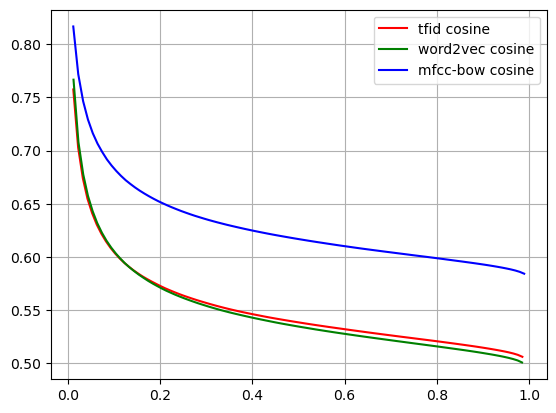

In [12]:
plt.plot(np.mean(r, axis=0), np.mean(p_max, axis=0), color='r', label='tfid cosine')
plt.plot(np.mean(r1, axis=0), np.mean(p1_max, axis=0), color='g', label='word2vec cosine')
plt.plot(np.mean(r2, axis=0), np.mean(p2_max, axis=0), color='b', label='mfcc-bow cosine')
plt.grid()
plt.legend()
plt.show()

In [61]:
file_cosine_mean_precision_datasets = './TopIdsTask2/df_cosine_mean_precision_datasets_plot.csv'
file_cosine_mean_recall_datasets = './TopIdsTask2/df_cosine_mean_recall_datasets_plot.csv'
file_cosine_maxprecision_precision_datasets = './TopIdsTask2/df_cosine_mean_maxprecision_datasets_plot.csv'

if (exists(file_cosine_mean_precision_datasets) and  exists(file_cosine_mean_recall_datasets) and exists(file_cosine_maxprecision_precision_datasets)):
    cosine_P = pd.read_csv(file_cosine_mean_precision_datasets, index_col=0).to_numpy()
    cosine_R = pd.read_csv(file_cosine_mean_recall_datasets, index_col=0).to_numpy()
    cosine_P_max = pd.read_csv(file_cosine_maxprecision_precision_datasets, index_col=0).to_numpy()
else:
    i = 0
    cosine_P = np.zeros((len(cosine_df.items()), 100))
    cosine_R = np.zeros((len(cosine_df.items()), 100))
    cosine_P_max = np.zeros((len(cosine_df.items()), 100))
    for value in cosine_df.values():
        cosine_P[i], cosine_R[i], cosine_P_max[i] = Precision(value, 100, True)
        i += 1  
    
    pd.DataFrame(cosine_P, index=cosine_df.keys()).to_csv(file_cosine_mean_precision_datasets)
    pd.DataFrame(cosine_R, index=cosine_df.keys()).to_csv(file_cosine_mean_recall_datasets)
    pd.DataFrame(cosine_P_max, index=cosine_df.keys()).to_csv(file_cosine_maxprecision_precision_datasets)

68641it [02:50, 401.88it/s]
68641it [02:37, 435.15it/s]
68641it [02:37, 434.60it/s]
68641it [02:32, 450.98it/s]
68641it [02:36, 439.88it/s]
68641it [02:46, 412.49it/s]
68641it [02:41, 424.72it/s]
68641it [02:35, 440.47it/s]
68641it [02:38, 434.15it/s]
68641it [02:32, 450.44it/s]
68641it [02:38, 434.22it/s]
68641it [02:33, 446.08it/s]
68641it [02:43, 420.79it/s]
68641it [02:41, 424.81it/s]
68641it [02:42, 422.07it/s]


In [73]:
file_jaccard_mean_precision_datasets = './TopIdsTask2/df_cosine_mean_precision_datasets_plot.csv'
file_jaccard_mean_recall_datasets = './TopIdsTask2/df_cosine_mean_recall_datasets_plot.csv'
file_jaccard_maxprecision_precision_datasets = './TopIdsTask2/df_cosine_mean_maxprecision_datasets_plot.csv'

if (exists(file_jaccard_mean_precision_datasets) and  exists(file_jaccard_mean_recall_datasets) and exists(file_jaccard_maxprecision_precision_datasets)):
    jaccard_P = pd.read_csv(file_jaccard_mean_precision_datasets, index_col=0).to_numpy()
    jaccard_R = pd.read_csv(file_jaccard_mean_recall_datasets, index_col=0).to_numpy()
    jaccard_P_max = pd.read_csv(file_jaccard_maxprecision_precision_datasets, index_col=0).to_numpy()
else:
    i = 0
    jaccard_P = np.zeros((len(jaccard_df.items()), 100))
    jaccard_R = np.zeros((len(jaccard_df.items()), 100))
    jaccard_P_max = np.zeros((len(jaccard_df.items()), 100))
    for value in jaccard_df.values():
        jaccard_P[i], jaccard_R[i], jaccard_P_max[i] = Precision(value, 100, True)
        i += 1  
    
    pd.DataFrame(jaccard_P, index=jaccard_df.keys()).to_csv(file_jaccard_mean_precision_datasets)
    pd.DataFrame(jaccard_R, index=jaccard_df.keys()).to_csv(file_jaccard_mean_recall_datasets)
    pd.DataFrame(jaccard_P_max, index=jaccard_df.keys()).to_csv(file_jaccard_maxprecision_precision_datasets)

68641it [02:48, 406.50it/s]
68641it [02:40, 427.38it/s]
68641it [02:39, 431.11it/s]
68641it [02:43, 420.89it/s]
68641it [02:47, 410.25it/s]
68641it [02:57, 385.80it/s]
68641it [02:53, 394.93it/s]
68641it [02:53, 395.04it/s]
68641it [02:42, 422.60it/s]
68641it [02:47, 408.73it/s]
68641it [02:49, 403.87it/s]
68641it [02:45, 413.81it/s]
68641it [02:49, 405.41it/s]
68641it [02:46, 411.18it/s]
68641it [02:42, 421.61it/s]


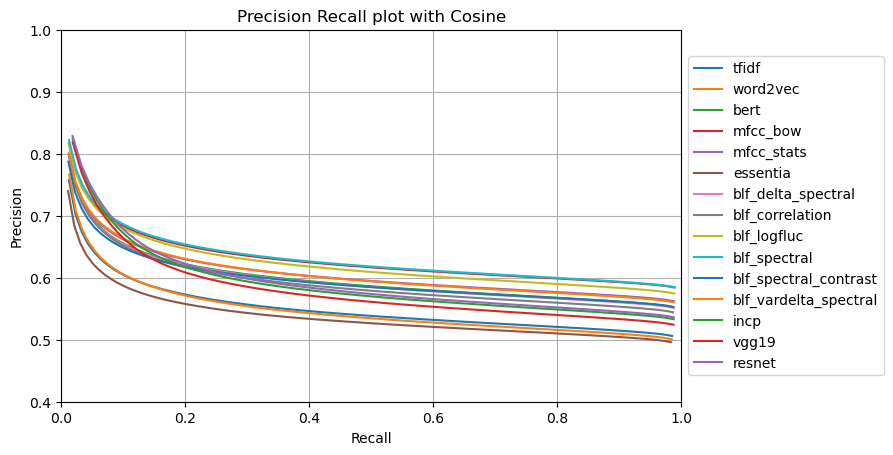

In [66]:
fig, ax = plt.subplots(figsize=(8, 8))

for i,key in enumerate(cosine_df.keys()):
    ax.plot(cosine_R[i], cosine_P_max[i], label=key)

ax.set_xlabel("Recall")
ax.set_ylabel("Precision")
ax.set_title("Precision Recall plot with Cosine")  # Add a title to the axes.
ax.set_aspect('equal')
ax.set_ylim(0.4,1) 
ax.set_xlim(0,1) 
ax.grid(True)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

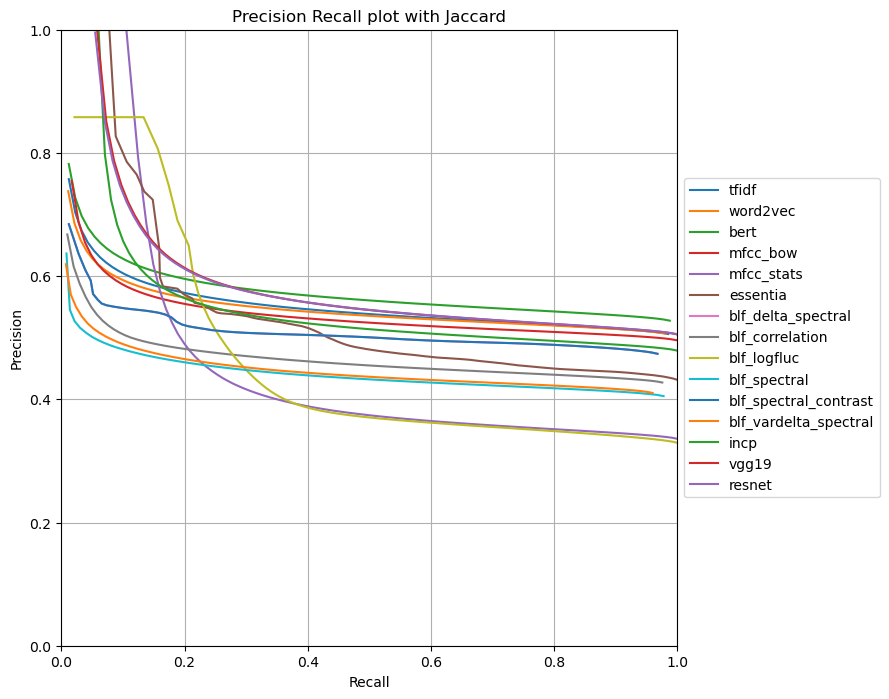

In [76]:
fig, ax = plt.subplots(figsize=(8, 8))

for i,key in enumerate(jaccard_df.keys()):
    ax.plot(jaccard_R[i], jaccard_P_max[i], label=key)

ax.set_xlabel("Recall")
ax.set_ylabel("Precision")
ax.set_title("Precision Recall plot with Jaccard")  # Add a title to the axes.
ax.set_aspect('equal')
ax.set_ylim(0,1) 
ax.set_xlim(0,1) 
ax.grid(True)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## Comparing between lyrics, audio and video

Text(0.5, 0.98, 'Comparison between Lyrics, Audio and Video')

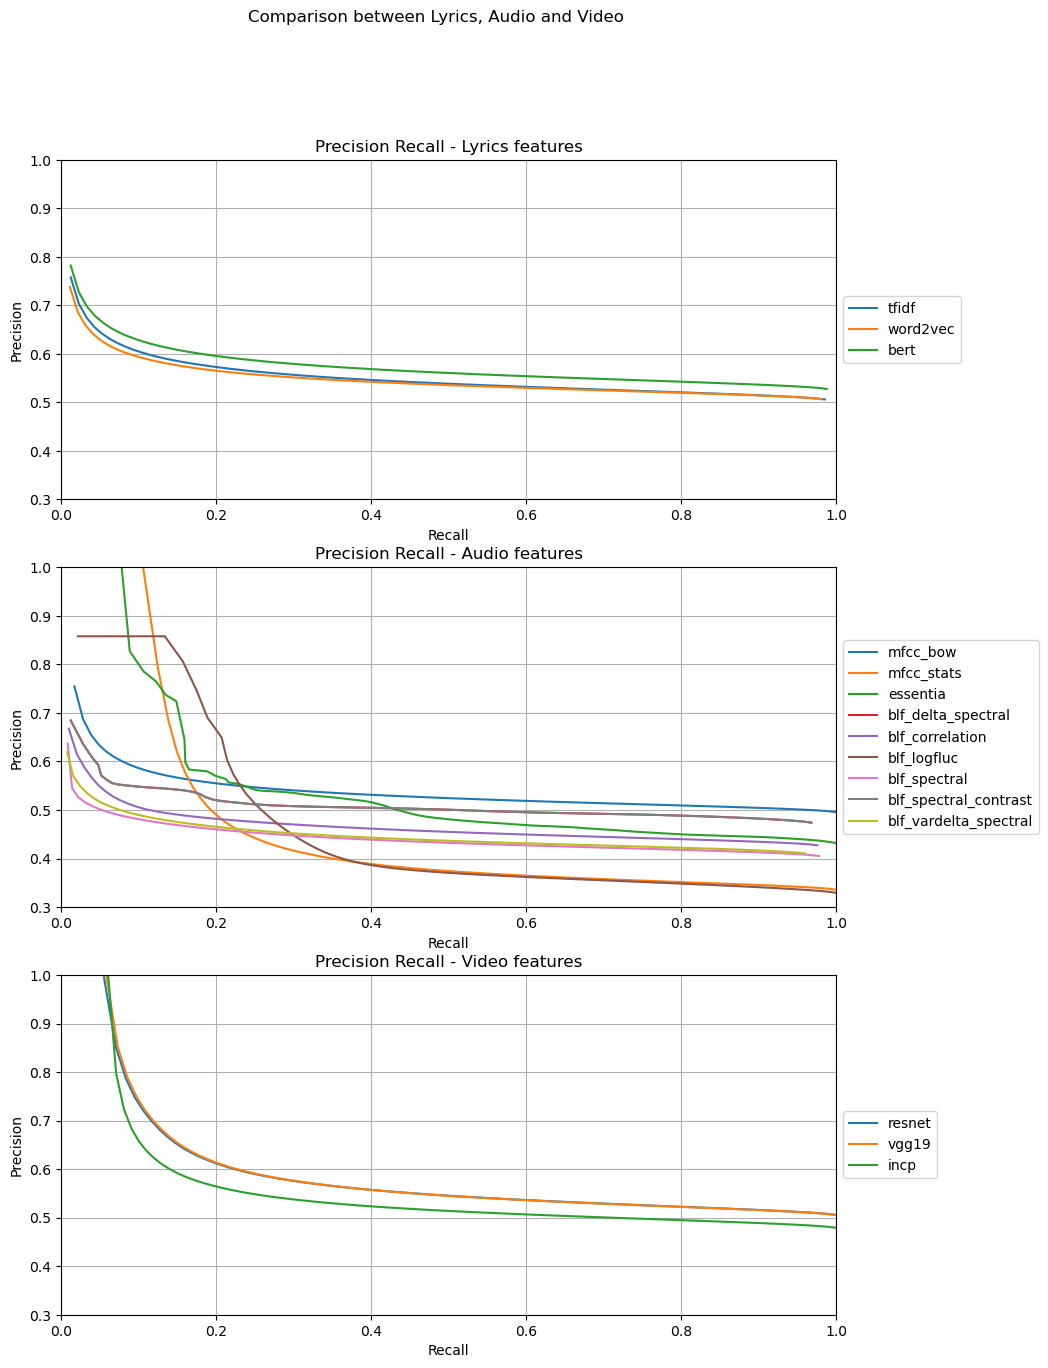

In [112]:
labels = list(jaccard_df.keys())
fig, axs = plt.subplots(ncols=1, nrows=3, figsize=(10, 15))

for i in range(3):
    axs[0].plot(jaccard_R[i], jaccard_P_max[i], label=labels[i])
axs[0].set_ylim(0.3,1) 
axs[0].set_xlim(0,1) 
axs[0].grid(True)
axs[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axs[0].set_xlabel("Recall")
axs[0].set_ylabel("Precision")
axs[0].set_title("Precision Recall - Lyrics features")

for i in range(9):
    axs[1].plot(jaccard_R[3+i], jaccard_P_max[3+i], label=labels[3+i])
axs[1].set_ylim(0.3,1) 
axs[1].set_xlim(0,1) 
axs[1].grid(True)
axs[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axs[1].set_xlabel("Recall")
axs[1].set_ylabel("Precision")
axs[1].set_title("Precision Recall - Audio features")
    
for i in range(3):
    axs[2].plot(jaccard_R[-1-i], jaccard_P_max[-1-i], label=labels[-1-i])
axs[2].set_ylim(0.3,1) 
axs[2].set_xlim(0,1) 
axs[2].grid(True)
axs[2].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axs[2].set_xlabel("Recall")
axs[2].set_ylabel("Precision")
axs[2].set_title("Precision Recall - Video features")

fig.suptitle('Comparison between Lyrics, Audio and Video Using Jaccard Similariy')

Text(0.5, 0.98, 'Comparison between Lyrics, Audio and Video using Cosine Similarity')

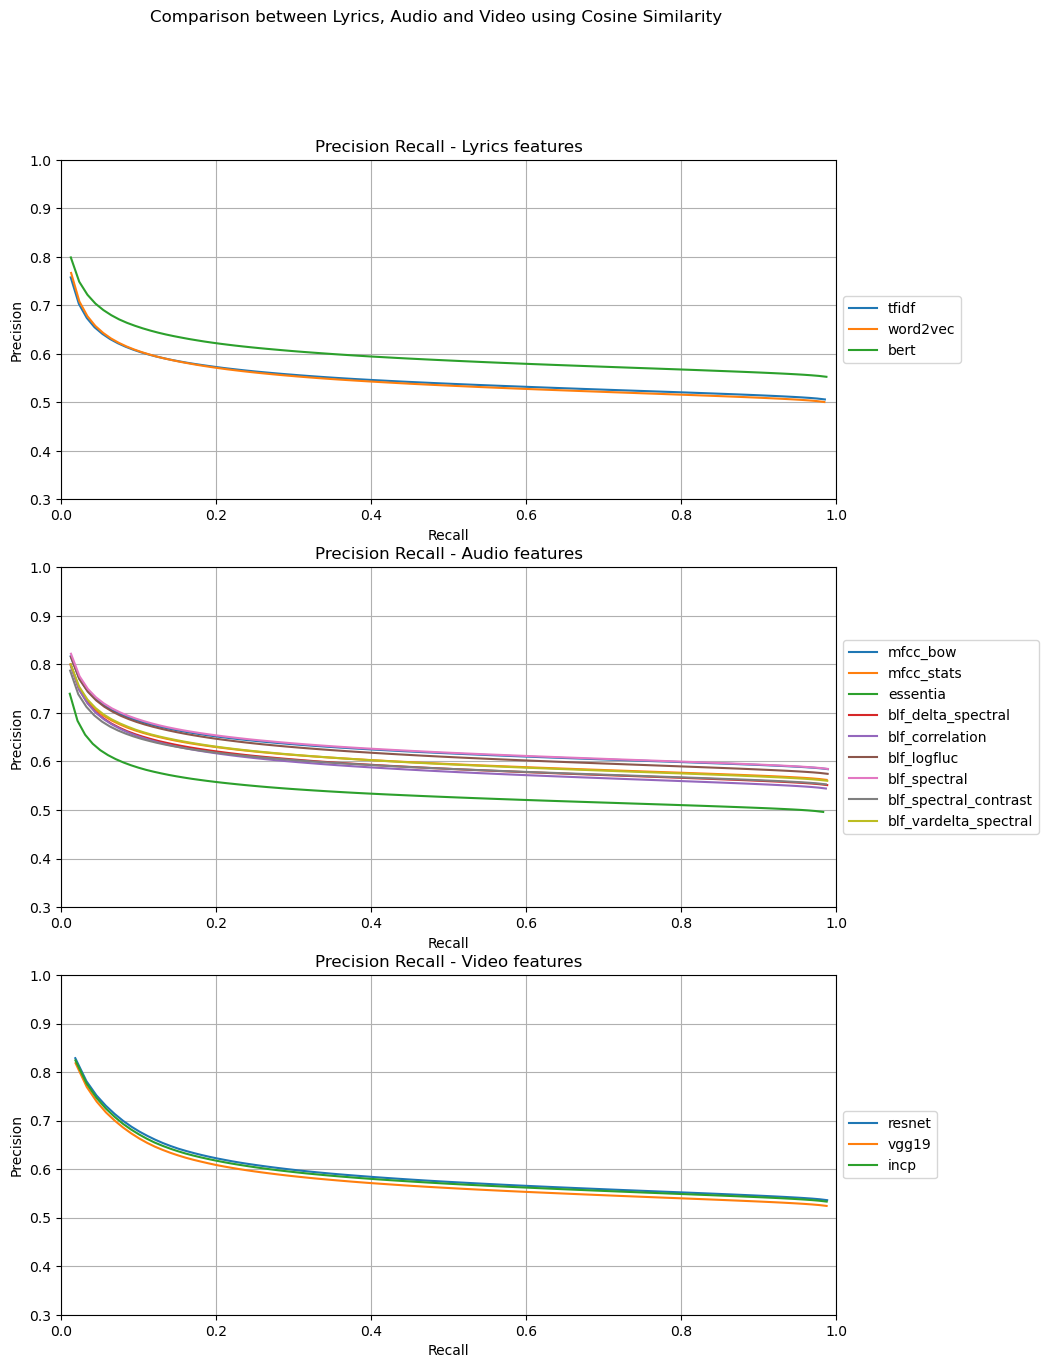

In [126]:
labels = list(cosine_df.keys())
fig, axs = plt.subplots(ncols=1, nrows=3, figsize=(10, 15))

for i in range(3):
    axs[0].plot(cosine_R[i], cosine_P_max[i], label=labels[i])
axs[0].set_ylim(0.3,1) 
axs[0].set_xlim(0,1) 
axs[0].grid(True)
axs[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axs[0].set_xlabel("Recall")
axs[0].set_ylabel("Precision")
axs[0].set_title("Precision Recall - Lyrics features")

for i in range(9):
    axs[1].plot(cosine_R[3+i], cosine_P_max[3+i], label=labels[3+i])
axs[1].set_ylim(0.3,1) 
axs[1].set_xlim(0,1) 
axs[1].grid(True)
axs[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axs[1].set_xlabel("Recall")
axs[1].set_ylabel("Precision")
axs[1].set_title("Precision Recall - Audio features")
    
for i in range(3):
    axs[2].plot(cosine_R[-1-i], cosine_P_max[-1-i], label=labels[-1-i])
axs[2].set_ylim(0.3,1) 
axs[2].set_xlim(0,1) 
axs[2].grid(True)
axs[2].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axs[2].set_xlabel("Recall")
axs[2].set_ylabel("Precision")
axs[2].set_title("Precision Recall - Video features")

fig.suptitle('Comparison between Lyrics, Audio and Video using Cosine Similarity')